# Polar precipitation and evaporation

Does precipitation at 60N balance the evaporation out of the bucket? 
This would imply a local water balance even though it's far away from the main moisture source, the southern hemisphere ocean. People imagine these areas to be desert, but this generates.

If it starts dry, does it stay dry? or do (winter time) storm tracks drag water vapor northward from the tropics where there is precipitation and high water vapor.

Or are we initializing with too much water? 

or winter time storm tracks bring more moisture there (winter because bigger temrperature gradient?) which stays in the bucket long enough to be drawn out during the winter time 

In [1]:
import os
import sys
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import glob
import dask.array as da
from copy import deepcopy

# My functions
sys.path.insert(0,'../tools')
import ds_utils as dsu
import ds_plots as dsp

In [2]:
# Ctrl dataset
data_dir = '/Users/tim/work/results/acdc/half_ocean_newbucket_0qflux_control'
globname = data_dir + '/*/*.nc'
file_list = glob.glob(globname)
file_list = sorted(file_list)
ds_ctrl = dsu.load_dataset(file_list)

In [3]:
# Drop first 8 years of spinup
ds_ctrl = ds_ctrl.where(ds_ctrl['time'].dt.year.isin(range(2,11)),drop=True)

# Compute climatology
ds_ctrl_clim = ds_ctrl.groupby('time.month').mean('time')

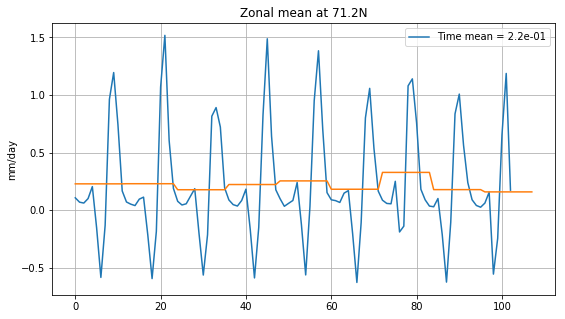

In [4]:
t = range(len(ds_ctrl['time']))
months = ds_ctrl_clim['month']

pme = ds_ctrl['precipitation'] - ds_ctrl['flux_lhe']
dsp.zonalMeanVsTime(t,pme,70,'mm/day')
plt.grid()

Plot above shows P-E zonal average at 71.2 deg N. Blue shows monthly average, orange shows annual average. The legend depicts the time mean. 

It is interesting that there is positive precipitation here, we want to know how this gets here.

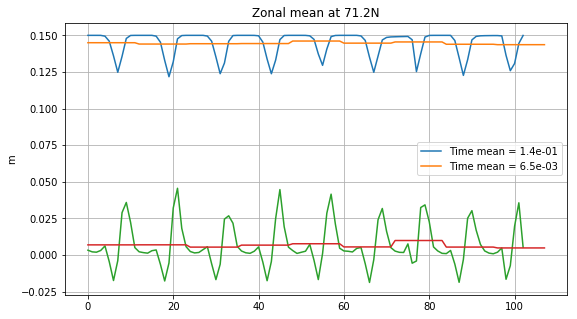

In [5]:
dsp.zonalMeanVsTime(t,(ds_ctrl['bucket_depth'],
                      pme*30*.001),70,'m')
plt.grid()

In [6]:
lat=ds_ctrl['lat']
pme_sh = pme.loc[dict(lat=lat[(lat<0)])].mean('lon').mean('lat')
pme_nh = pme.loc[dict(lat=lat[(lat>0)])].mean('lon').mean('lat')

<xarray.DataArray ()>
array(-0.157371)
<xarray.DataArray ()>
array(0.235846)


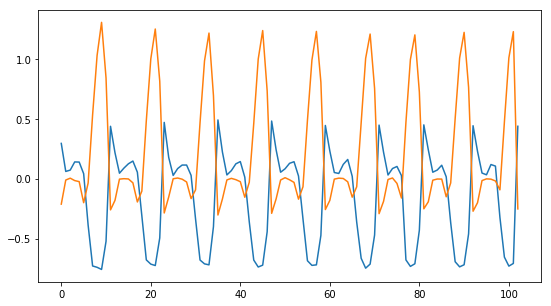

In [7]:
plt.figure(figsize=(9,5))
plt.plot(t,pme_sh,pme_nh)
print(pme_sh.mean('time'))
print(pme_nh.mean('time'))

The above plot shows SH average P-E (blue) and NH average P-E (orange). 
It's interesting that the SH is exporting moisture to the North.

NOTE: these numbers need to be verified to make sure the correct averages are being taken.